**Проектная работа "Games"**
_____

**Цель проекта**

выявить определяющие успешность игры закономерности.
_____

**Задачи исследования.**

1. <a href="#1.-Знакомство-с-данными">Знакомство с данными</a>
2. <a href="#2.-Подготовка-данных">Подготовка данных</a>
3. <a href="#3.-Исследовательский-анализ-данных">Исследовательский анализ данных</a>
4. <a href="#4.-Составить-портрет-пользователя-каждого-региона">Составить портрет пользователя каждого региона</a>
5. <a href="#5.-Проверка-гипотез">Проверка гипотез</a>
6. <a href="#6.-Общий-вывод">Общий вывод</a>
_____

**Исходные данные:**
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных 
игр и присваивает им подходящую возрастную категорию.



## 1. Знакомство с данными

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotly.express as px
import chart_studio.plotly as py
import cufflinks
import warnings
from plotly.offline import iplot
from scipy import stats as st

cufflinks.go_offline()

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:2f}'.format

try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('/Users/ivanivanovich/Documents/yandex practicum/сборный проект/games.csv')


In [2]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.000000,Sports,41.360000,28.960000,3.770000,8.450000,76.000000,8,E
1,Super Mario Bros.,NES,1985.000000,Platform,29.080000,3.580000,6.810000,0.770000,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.000000,Racing,15.680000,12.760000,3.790000,3.290000,82.000000,8.3,E
3,Wii Sports Resort,Wii,2009.000000,Sports,15.610000,10.930000,3.280000,2.950000,80.000000,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.000000,Role-Playing,11.270000,8.890000,10.220000,1.000000,NaN,NaN,NaN


In [3]:
'Количество явных дубликатов:', data.duplicated().sum()

('Количество явных дубликатов:', 0)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [6]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
Name,0.000000
Platform,0.000000
Year_of_Release,2.000000
Genre,0.000000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
Other_sales,0.000000
Critic_Score,51.000000
User_Score,40.000000


In [7]:
# посмотрим, что с рейтингами

esrb_rating = data.loc[data['NA_sales'] == 0, 'Name']
esrb_rating.nunique()

4089

In [8]:
# поищем дубликаты

duplicaterows = data[data.duplicated(['Name', 'Platform'])]
duplicaterows

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1591,Need for Speed: Most Wanted,X360,2005.000000,Racing,1.000000,0.130000,0.020000,0.100000,83.000000,8.5,T
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.000000,0.480000,0.000000,0.000000,43.000000,4.1,E10+
11715,Need for Speed: Most Wanted,PC,2012.000000,Racing,0.000000,0.060000,0.000000,0.020000,82.000000,8.5,T
14244,NaN,GEN,1993.000000,NaN,0.000000,0.000000,0.030000,0.000000,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.000000,Sports,0.000000,0.010000,0.000000,0.000000,83.000000,5.5,E


**Вывод**
- Year_of_Release тип float64, должно быть datetime, но так как мы оставим только год, будет int, так же в этом столбце 269  пропусков (всего 2%, что в принципе смело позволяет нам избавиться от этих значений не переживая, что это как-то повлияет на результат исследования)
- Critic_Score тип float64, должно быть int64, а еще 8578 пропущенных данных (это 51%), что очень много
- User_Score тип object, должно быть float64, пропущенных данных 6701 (40%) это тоже очень много,  игроки не проффессионалы и не обязаны выставлять рейтинг каждой игре, видимо отсюда и пропуски, так же в этом столбце присутствуе аббревиатура: "TBD" - предстоит определить, похоже, что TBD это просто заглушка для пропусков, но тогда не совсем ясно, почему есть именно пропуски и есть TBD
- Rating - 6766 пропусков (40%), тк ESRB это система рейтингов использующаяся только в сша, очевидно, что те тайтлы которые не выходили в сша не получили рейтинг ESRB, а таких 4089. 4089 тайтлов не имеющих рейтинг не по причине какой-то ошибки, а ввиду его отсутствия. получается, что пропущенных данных на  самом деле имеется 2677, а это 16.02%, по прежнему многовато, но гораздо лучше 40%
- Обнаружились дубликаты, немного

- И так на промежуточный итог - нужно поменять типы данных у нескольких столбцов, тут ничего страшного, гораздо хуже, что мы имеем пропуски, в отдельных столбцах, количество которых доходит до 51%, а это очень много.

## 2. Подготовка данных

#### 2.1 Замените названия столбцов (приведите к нижнему регистру);


In [9]:
data.columns = data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.000000,Sports,41.360000,28.960000,3.770000,8.450000,76.000000,8,E
1,Super Mario Bros.,NES,1985.000000,Platform,29.080000,3.580000,6.810000,0.770000,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.000000,Racing,15.680000,12.760000,3.790000,3.290000,82.000000,8.3,E
3,Wii Sports Resort,Wii,2009.000000,Sports,15.610000,10.930000,3.280000,2.950000,80.000000,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.000000,Role-Playing,11.270000,8.890000,10.220000,1.000000,NaN,NaN,NaN


#### 2.2 Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;

In [10]:
data.shape


(16715, 11)

In [11]:
data = data.dropna(subset=['year_of_release', 'name'])
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y').dt.year

In [12]:
data.shape

(16444, 11)

In [13]:
data['critic_score'] = data['critic_score'].fillna(0).astype('int')

data.loc[(data.user_score == 'tbd'), 'user_score'] = 111
data['user_score'] = data['user_score'].fillna(0).astype('float')

data.loc[(data.na_sales == 0), 'rating'] = 'not_rated'
data['rating'] = data['rating'].fillna('unknown')

# создадим новый столбец с суммой продаж по всем регионам

data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis = 1)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.6+ MB


In [14]:
data = data.drop_duplicates(subset=['name', 'platform'], keep = 'first')

In [15]:
data.shape

(16441, 12)

**Вывод**
- year_of_release изменил тип на int и удалил строки с пропущенными значениями, тк их кол-во 2%
- name удалил строки с пропущенными значениями - их было всего 2
- critic_score изменил тип на int, пропуски заполнил нулями, тк игр с нулевым рейтингом на моей памяти не выходило, такой подход не должен привести к путанице
- user_score изменил тип на float, пропуски заполнил нулями, там где стояла tbd (значит, что игра получит рейтинг в будущем, на на текущий момент его не имеет. Кстати очень странно видеть подобную заглушку в графе user score, обычно такие можно видеть на странице игры в разделе critic score, тк только у критиков или журналистов есть возможность ознакомится с продуктом до релиза и поставить ему оценку, но ладно) заменил на 111, тк рейтинг оценивается по 10 бальной шкале, подобное значение не смешается с пропусками а на графике будет видно как выброс, что придется учесть в дальнейшем
- rating ранее мы выяснили, что конкретно этот рейтинг - ESRB и он относится только к релизам в сша, соответственно игры не получвшие релиза в сша не будут иметь рейтинг, таким тайтлам было присвоено значение not_rated, там же, где были пропуски было присвоено значение unknown
- принял решение не пытаться заполнять пропуски в critic score и user score средним значеним по жанру или иным другим способом, так как те же гонки или футбол у двух разных компаний могут получиться совершенно разными и будут по разному восприняты, от чего мне видится невозможным подобный метод заполнения, даже более того это может исказить результат исследования

## 3. Исследовательский анализ данных

#### 3.1 Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [16]:
# чтобы посмотреть количество игр вышедшех за каждый год, создадим сводную таблицу

pivot_sales = data.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count').reset_index()
pivot_sales.columns = ['year', 'quantity']
pivot_sales

,year,quantity
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


In [17]:
# ну и график для наглядности

fig = px.bar(pivot_sales, x = 'year', y = 'quantity', color = 'quantity', title = 'Количество Игр в Год')
fig.show()

**Вывод**
- Как видно из данных, количество выпусуаемых в год игр до 1995 года была незначительна (видимо после краха индустрии домашних видеоигр 1983 года рынок долго не мог оправиться), поэтому думаю нет смысла брать отрезок с 1980 по 1994 включительно. 
- Начиная с 1990 и вплоть до 2009 года можно наблюдать рост выпуска игр, но уже начиная с 2010 года их количество пошло на спад
- 2008 и 2009 годы были самыми продуктивными, тогда вышло 1427 и 1426 игр соответственно
- Судя по всему такой рост связан с тем, что увеличилось и количество платформ для которых выпускали игры. Больше платформ = больше игр

In [18]:
# проверим предположение, больше платформ = больше игр

platforms_per_year = data[['year_of_release', 'platform']]
platforms_per_year = platforms_per_year.drop_duplicates(subset=['year_of_release', 'platform'], keep = 'first')
platforms_per_year = platforms_per_year.pivot_table(index = 'year_of_release',
                                                    values = 'platform', aggfunc = 'count').reset_index()
platforms_per_year

fig = px.bar(platforms_per_year, x = 'year_of_release',
             y = 'platform', color = 'platform', title = 'Количество Платформ в Год')
fig.show()


- пики двух графиков не совпадают, в 2008 и 2009 году было продано больше всего игр, в те годы на рынке присутствовало 9 и 7 игровых платформ соответственно, в 1995 году на рынке было 10 консолей но по продажам этот год демонстрирует один из самых низких показателей, предположение о том, что чем больше консолей, тем больше игр не подтверждается данными.
- очевидно, что дело в другом, вероятно с годами сфера набирала популярность и вовлекала все больше потребителей, но в какой - то момент наметился спад. Возможно спад может быть связан с мировым финансовым кризисом 2008 - 2011 годов. Так как разработка игры процесс не быстрый и занимает как правило 2 - 3 года, то первые годы кризиса не сильно повлияли на продажи, тк игры продолжали выходить, что судя по графику похоже на правду, тк как после завершения финансового кризиса мы видим, что уровень продаж (2012 год )находится на болле низком уровне чем прежде (2008 год) и на протяжении четырех лет продажи не росли. Похоже, что не всем студиям удалось пережить кризис и их количество сократилось, а вместе с ними и количество игр, к тому же вероятно, что издатели пытались минимизировать риски и старались выпускаьт только наиболее потенциально прибыльные проекты, а менее прибыльные либо замораживали, либо отменяли. К сожалению данных на 2017 год нет, но предположу, что там возобновится рост продаж, который будет идти вплоть до 2020 - 2021 года, после чего снова будет спад вызванный пандемией 2019 года.

#### 3.2 Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [19]:
# посмотрим консоли с наибольшими продажами

pivot_consoles = data.pivot_table(index = ['platform'], values = 'total_sales', aggfunc = 'sum').reset_index()
pivot_consoles.columns = ['platform', 'total_sales']
pivot_consoles = pivot_consoles.sort_values(by = 'total_sales', ascending = False)

pivot_consoles

,platform,total_sales
16,PS2,1233.560000
28,X360,959.990000
17,PS3,931.330000
26,Wii,891.180000
4,DS,802.780000
15,PS,727.580000
18,PS4,314.140000
6,GBA,312.880000
19,PSP,289.530000
2,3DS,257.810000


In [20]:
fig = px.bar(
    pivot_consoles,
    x = 'platform', 
    y = 'total_sales', 
    color = 'total_sales', 
    title = 'Рейтинг консолей по продажам')

fig.show()

**промежуточный вывод**
- как видно из таблицы, консолями с суммарными продажами от 727.5млн и до 1233.5млн, остальные значительно от них отстают. В список бестселлеров попало 6 платформ: PS2, X360, PS3, Wii, DS и PS.
- из графика, как впрочем и по цифрам хорошо видно, что бесспорным лидером по продажам игр является Playstation 2, которая кстати является и самой продаваемой консолью за всю историю
- забавный факт: как правило в первые годы продаж, консоли продаются по себестоимости или даже ниже, тк производители приставок основную прибыль получают с продаж игр и софта, а не самих консолей. Так как платформодержателю выгодно, продавать как можно больше игр он стремится реализовать как можно больше консолей, порой себе в убыток, как правило прибыль платформодержатель начинает получат на 2 - 3 год существования консоли

In [21]:
def pivot(data, console):
    'функция выводит таблицу и график по указанной консоли'
    result = data.loc[data['platform'] == console].pivot_table(
        index = 'year_of_release',
        values = 'total_sales',
        aggfunc = 'sum'
    ).reset_index()
    result.columns = ['year','total_sales']
    display(result)
    
    fig = px.bar(
        result,
        x = 'year', 
        y = 'total_sales', 
        color = 'total_sales', 
        title = 'Продажи '+ console)
    fig.show()
    #return result
    

pivot(data, 'PS2')

,year,total_sales
0,2000,39.170000
1,2001,166.430000
2,2002,205.380000
3,2003,184.310000
4,2004,211.810000
5,2005,160.660000
6,2006,103.420000
7,2007,75.990000
8,2008,53.900000
9,2009,26.400000


- золотые годы PS2 - c 2001 по 2005, с выходом PS3 в 2006 году, интерес к ПС2 стал резко снижаться, что не удивительно.

In [22]:
pivot(data, 'X360')

,year,total_sales
0,2005,7.000000
1,2006,51.620000
2,2007,95.410000
3,2008,135.260000
4,2009,120.290000
5,2010,170.030000
6,2011,143.840000
7,2012,99.740000
8,2013,88.580000
9,2014,34.740000


- для Xbox 360 продажи начались в 2005 году, н были относительно низкими, оно и не удивительно, тк релиз консоли состоялся в конце ноября этого же года и у разработчиков просто не было времени для выпуска игр. Но зато со следующего 2006 и по 2010 идет ощутимый рост продаж, с небольшим проседанием в 2009 году, начиная с 2011 продажи плавно идут на спад, а с выходом в конце 2013 Xbox one резко обваливаются.

In [23]:
pivot(data, 'PS3')

,year,total_sales
0,2006,20.960000
1,2007,73.190000
2,2008,118.520000
3,2009,130.930000
4,2010,142.170000
5,2011,156.780000
6,2012,107.350000
7,2013,113.250000
8,2014,47.760000
9,2015,16.820000


картина напоминает, то, что мы видели у Xbox 360, на релизе в 2006 году консоль демонстрирует слабые продажи, однако в следующем 2007 их количество увеличилось больше чем в три раза, рост продолжался вплоть до 2011 года, а начиная с 2013 продажи резко пошли на спад, оно и не удивительно, ведь в этом году вышел приемник PS3 - PS4

In [24]:
pivot(data, 'Wii')

,year,total_sales
0,2006,137.150000
1,2007,152.770000
2,2008,171.320000
3,2009,206.970000
4,2010,127.950000
5,2011,59.650000
6,2012,21.710000
7,2013,8.590000
8,2014,3.750000
9,2015,1.140000


- старт продаж nintendo Wii - ноябрь 2006 года, причем релиз консоли состоялся сразу по всему миру и с первого же года консоль демонстрирует хорошие показатели продаж, однако после 2010 года наблюдается резкое падение

In [25]:
pivot(data, 'DS')

,year,total_sales
0,1985,0.020000
1,2004,17.270000
2,2005,130.140000
3,2006,119.810000
4,2007,146.940000
5,2008,145.310000
6,2009,119.540000
7,2010,85.020000
8,2011,26.180000
9,2012,11.010000


In [26]:
# а вот это интересно, посмотрим, кто может смотреть в завтрашний день

mistake = data.loc[(data['platform'] == 'DS') & (data['year_of_release'] < 2000)]
mistake

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.000000,0.000000,0.020000,0.000000,0,0.000000,not_rated,0.020000


- очевидно, тут ошибка, тк Nintendo DS вышла в 2004 году и в 1985 году игры для нее создаваться не могли, судя по всему речь идет о игре вышедшей в 2010 году, только для японского рынка. Об игре слишком мало сведений + продажи не велики, поэтому проще будет ее удалить

In [27]:
data = data.drop(mistake.index, axis = 0)

- Nintendo ds релиз состоялся в 2004 году и судя по графику был довольно слабым, однако уже в следующем году мы видим увеличение продаж более чем в 7 раз, невероятные показатели, с 2005 по 2009 год продажи держались приблизительно на одном уровне, после чего видно падение, в 2011 с выходом на рынок приемницы ds - 3ds продажи первой - рухнули

In [28]:
pivot(data, 'PS')

,year,total_sales
0,1994,6.030000
1,1995,35.960000
2,1996,94.700000
3,1997,136.170000
4,1998,169.490000
5,1999,144.530000
6,2000,96.370000
7,2001,35.590000
8,2002,6.670000
9,2003,2.070000


- продажи пс демонстрируют нормальное распределение, начиная с 1994 года и до 1998 виден плавный рост, после плавное падение 

#### Вывод
- И так, по графикам видно, что самая популярная консоль - это Playsttion 2, пик ее продаж пришелся на 2004 год, тогда суммарные продажи по всему миру состоавили 211.8 млн., чуть меньше - 205.3 млн. пришлось на 2002 год.^
- второй консолью в нашем списке сумевшей перешагнуть барьер в 200 млн суммарных продаж за год - является Nintendo Wii, в 2006 году продажи составили 206.9 млн.^^ 
- на третьем месте разместились сразу две консоли - Playstation и Xbox360, c суммарные продажами около 170 млн. каждая. Пик продаж Playstation пришолся на 1998 год а Xbox360 на 2010
- четвертое место занимает Playstation 3 с сумарными продажами в 156 млн в 2011 году
- ну и наконец завершает топ Nintendo DS с продажами в 146 млн на 2007 год, в 2008 году консоли практически удалось повторить этот показатель, продажи составили 146 млн.^^^
- в целом прослеживается общая закономерность, с выходом консолей нового поколения, продажи консолей старого поколения резко снижаются
- так как в топ вошли аж три поколения приставок Playstation на их проимере и посмотрим срок жизни поколения: PS - c 1994 по 2003, PS2 - с 2000 по 2011 и PS3 с 2006 по 2016. В среднем получается около 10 лет. Но стоит учесть, что последние 3 - 4 года жизни игровой консоли наблюдается спад продаж вызванный выходом консолей нового поколения, поэтому учитывая вышесказанное актуальный срок жизни консолей в среднем составляет 7 лет, после количество игр выпускаемых на старое поколение снижается, тк ресурсы разработчиков не бесконечны и они переключаются на создание новых игр под более современные консоли
- актуальый период с 2013 по 2016 год, тк в 2013 году состоялся релиз PS4 и Xbox One, актуальными эти консоли будут до 2020 года, после им на смену придут консоли нового поколения

**Примечание**
- ^  *Это и не удивительно, тк PS2 вошла в книгу рекордов Гиннеса как самая продоваемая консоль и остается ей и по сей день. Такого успеха сони удалось добиться засчет того, что на старте консоль стоила всего 299$ и имела dvd привод, что делало ее весьма привлекательной покупкой не только для геймеров но и для людей не вовлеченных в индустрию, так некоторые покупали ее в качестве дешевого dvd проигрывателя*
- ^^ *Однако приставке не удалось повторить судьбу ПС2. И хоть консоль оказалась довольно интересной, во многом за счет иновационного моушн управления, отсталая начинка по меркам своего времени не позволила на равных бороться со своими прямыми конкурентами в лице PS3 и Xbox360, и хоть мы видим довольно хорошие продажи, на самом деле дела у консоли шли не важно,  несмотря на то, что по продажам игр консоль находится на 2м месте, это связано не с тем, что люди охотно покупали игры, а с тем, что в комплекте с консолью, шла и игра, продажи которой видимо учитывались отдельно (в целом типичный подход Nintendo, так самой продаваемой игрой считается super Mario bros - около 40 млн. экземпляров, такого показателя удалось добиться потому, что игра шла в комплекте с приставкой nes). Как правило библиотека среднего владельца Nintendo Wii не превышала 3х игр, люди не охотно покупали новые игры. Поэтому хоть сама консоль продалась огромным количеством, на продаже софта компании практически не удалось ничего заработать, а как известно - софт составляет основной доход платформодержателя*
- ^^^  *Кстати Nintendo DS является единственной портативной консолью в топе, в то время как остальные участники - стационарные*

In [29]:
# посмотрим какие консоли принесли наибольшую прибыль за актуальный переиод

actual_period = data.loc[data['year_of_release'] >= 2013, ['total_sales', 'platform', 'year_of_release']]
actual_period_s = actual_period.pivot_table(
    index = ['platform', 'year_of_release'],
    values = 'total_sales',
    aggfunc = 'sum'
)
 
best_sellers = actual_period_s.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').reset_index()
best_sellers.columns = ('platform', 'total_sales')
best_sellers = best_sellers.sort_values(by = 'total_sales', ascending = False)
best_sellers


,platform,total_sales
4,PS4,314.140000
3,PS3,181.430000
10,XOne,159.320000
0,3DS,143.250000
9,X360,136.800000
8,WiiU,64.630000
2,PC,39.430000
6,PSV,32.990000
7,Wii,13.660000
5,PSP,3.500000


In [30]:
fig = px.bar(
    best_sellers,
    x = 'platform', 
    y = 'total_sales', 
    color = 'total_sales', 
    title = 'Рейтинг актуальных консолей по суммарным продажам игр во всех регионах')
fig.show()

In [31]:
# Ну и круговую диаграмму выведим, что бы посмотреть долю в процентах для каждой консоли

fig = best_sellers.iplot(
    kind="pie",
    labels="platform",
    values="total_sales",
    title=" Процент распределения актуальных платформ по продажам игр",
)

- исходя из данных, можно смело сделать вывод, что на 2017 год хороший потенциал роста есть только у PS4, остальные консоли из списка актуальных уже либо подошли к концу своего жизненного цикла, либо оказались коммерчески менее успешными и демонстрируют отрицательный рост:)))) продаж
- так как в задании указано несколько платформ, я предположу, что шансы на рост есть еще и у Xbox one, тк консоль находится в середине жизненного цикла и получает активную поддержку от разработчиков и игроделов, а еще PC
- все консоли старого поколения в 2017 году будут демонстрировать только спад продаж, либо вообще покинут рынок, среди них PS3, X360, 3DS, WiiU, PSV и прочие

**Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.**

In [32]:
# подготовим данные для построения графика, для этого отфильтруем данные за актуальный период и сохраним их в новую переменную

actual_period = data.loc[data['year_of_release'] >= 2013, [
    'total_sales',
    'platform',
    'year_of_release',
    'name', 'critic_score',
    'user_score',
    'genre',
    'rating'
]]

actual_period.head()

,total_sales,platform,year_of_release,name,critic_score,user_score,genre,rating
16,21.050000,PS3,2013,Grand Theft Auto V,97,8.200000,Action,M
23,16.270000,X360,2013,Grand Theft Auto V,97,8.100000,Action,M
31,14.630000,PS4,2015,Call of Duty: Black Ops 3,0,0.000000,Shooter,unknown
33,14.600000,3DS,2013,Pokemon X/Pokemon Y,0,0.000000,Role-Playing,unknown
42,12.620000,PS4,2014,Grand Theft Auto V,97,8.300000,Action,M


In [33]:
# теперь создадим сводную таблицу, по которой построим график

actual_period_s = actual_period.pivot_table(
    index = ['year_of_release', 'name', 'critic_score', 'user_score'],
    columns = 'platform',
    values = 'total_sales',
    aggfunc = 'sum'
)
actual_period_s.describe()

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
count,303.000000,8.000000,189.000000,345.000000,392.000000,67.000000,358.000000,23.000000,115.000000,186.000000,247.000000
mean,0.472772,0.192500,0.208624,0.525884,0.801378,0.052239,0.092151,0.593913,0.562000,0.735484,0.645020
std,1.381347,0.172026,0.352304,1.451939,1.609456,0.059768,0.153816,0.915432,1.038778,1.663275,1.036139
min,0.010000,0.030000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
25%,0.040000,0.067500,0.030000,0.040000,0.060000,0.015000,0.020000,0.045000,0.060000,0.080000,0.060000
50%,0.090000,0.150000,0.080000,0.150000,0.200000,0.020000,0.040000,0.180000,0.200000,0.265000,0.220000
75%,0.280000,0.252500,0.230000,0.510000,0.730000,0.070000,0.110000,0.755000,0.595000,0.795000,0.685000
max,14.600000,0.510000,3.050000,21.050000,14.630000,0.240000,1.960000,3.580000,7.090000,16.270000,7.390000


In [34]:
# Выведем графики по каждой консоли

actual_period_s.iplot(
    x = 'platform',
    y = 'total_sales',
    kind = 'box',
    title = 'Глобальные продажаи игр в разбивке по платформам')

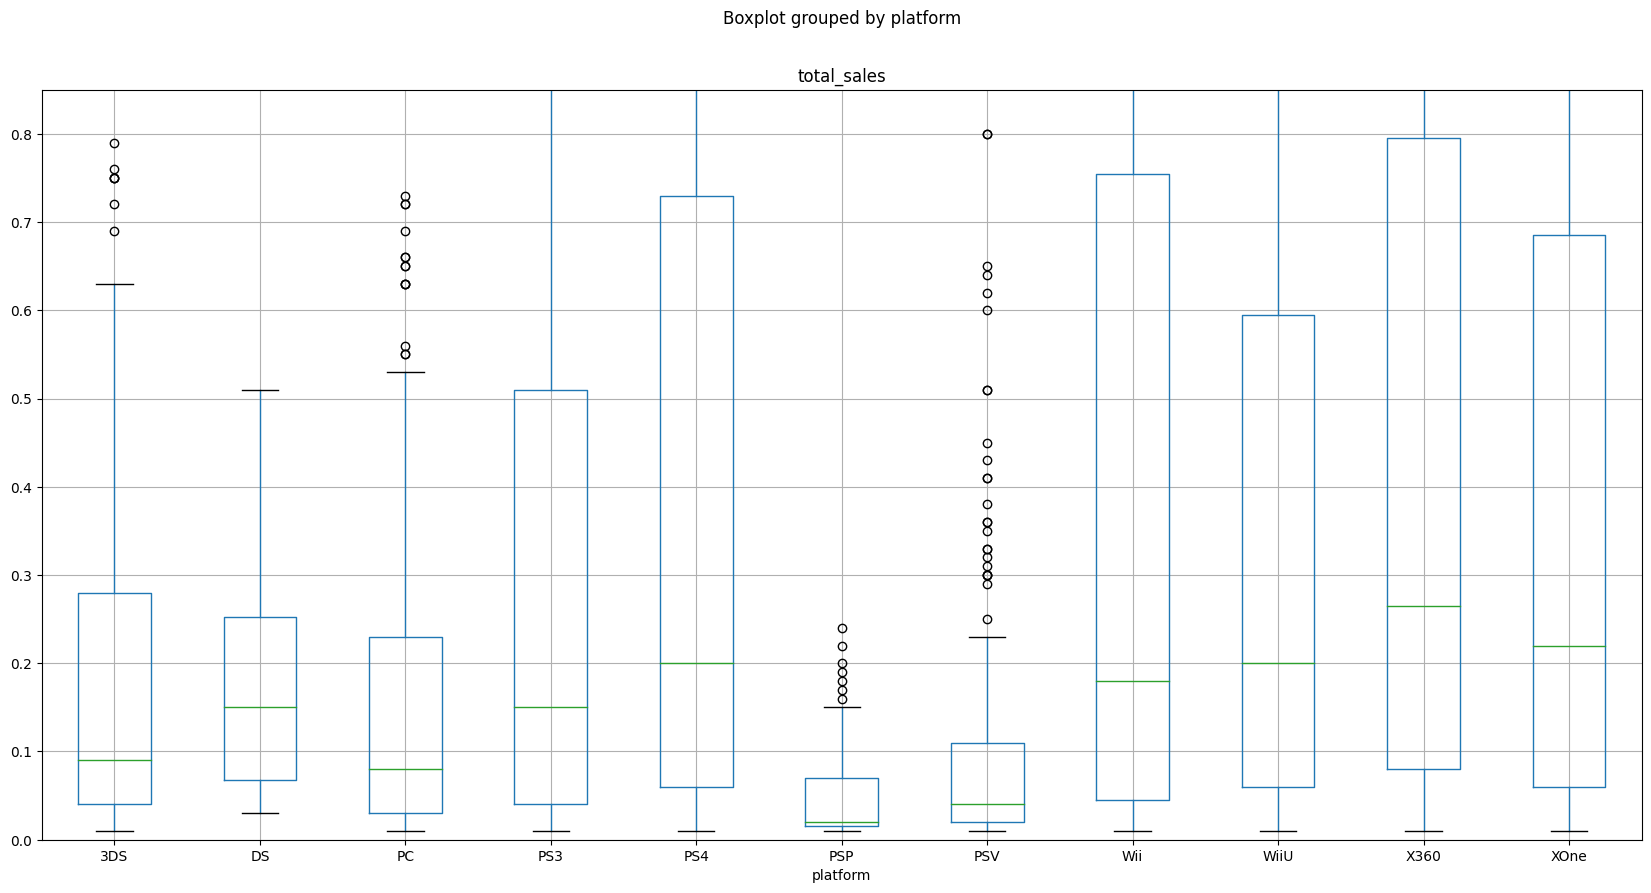

In [35]:
# подгоняем диапозон по оси Y

actual_period.boxplot(column='total_sales', by='platform', figsize=(20, 10))
plt.ylim(0, 0.85)
plt.show()

count   2233.000000
mean       0.488442
std        1.235226
min        0.010000
25%        0.030000
50%        0.110000
75%        0.400000
max       21.050000
Name: total_sales, dtype: float64

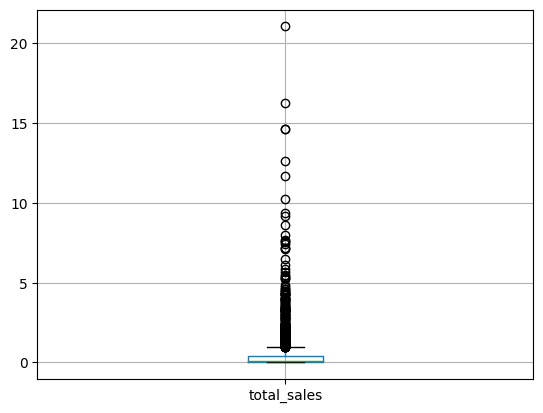

In [36]:
# выведим сумарный график по всем консолям

actual_period.boxplot('total_sales')
actual_period['total_sales'].describe()

- из графиков хорошо видно, что от консоли к консоли данные разнятся, хотя минимальная сумма за игру у всех = 10 тыс.
- в среднем по всем конслям прибыль от одной игры 488 тыс.
- судя по продажам, самые популярные игры вышли для консолей PS3, X360, PS4 и 3DS

**Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.**

In [37]:
# посмотрим на оценки критиков

game_score = actual_period.loc[(actual_period['platform'] == 'PS4') & (
    actual_period['critic_score'] != 0)]
[
    'critic_score',
    'user_score',
    'rating',
    'total_sales']

# для построения диаграммы придется сменить тип данных critic_score на float

game_score['critic_score'] = game_score['critic_score'].astype('float')

game_score.head()

,total_sales,platform,year_of_release,name,critic_score,user_score,genre,rating
42,12.620000,PS4,2014,Grand Theft Auto V,97.000000,8.300000,Action,M
77,8.580000,PS4,2015,FIFA 16,82.000000,4.300000,Sports,E
92,7.660000,PS4,2014,Call of Duty: Advanced Warfare,83.000000,5.700000,Shooter,M
94,7.600000,PS4,2016,FIFA 17,85.000000,5.000000,Sports,E
105,7.170000,PS4,2015,Fallout 4,87.000000,6.500000,Role-Playing,M


In [38]:
game_score.iplot(
    x = 'critic_score',
    y = 'total_sales',
    # Указываем категорию
    categories = 'critic_score',
    xTitle='оценки критиков',
    yTitle='суммарные продажи',
    title='Диаграмма рассеяния для PS4')

print('Корреляция Пирсона для оценок критиков ровна: ', game_score['critic_score'].corr(game_score['total_sales']))


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/cufflinks/plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/cufflinks/plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.



Корреляция Пирсона для оценок критиков ровна:  0.40656790206178095


Тут мы видим корреляцию 0.4, что говорит о том, что между продажами игр и оценками критиков есть линейная слабая связь

In [39]:
#  уберем из среза пользовательских оценок ранее поставленные заглушки, что - бы они не искажали данные

game_score = game_score.loc[(game_score['user_score'] != 0) & (
    game_score['user_score'] != 111)]
[
    'critic_score',
    'user_score',
    'rating',
    'total_sales']

warnings.simplefilter("ignore", category=FutureWarning)
game_score.head()

,total_sales,platform,year_of_release,name,critic_score,user_score,genre,rating
42,12.620000,PS4,2014,Grand Theft Auto V,97.000000,8.300000,Action,M
77,8.580000,PS4,2015,FIFA 16,82.000000,4.300000,Sports,E
92,7.660000,PS4,2014,Call of Duty: Advanced Warfare,83.000000,5.700000,Shooter,M
94,7.600000,PS4,2016,FIFA 17,85.000000,5.000000,Sports,E
105,7.170000,PS4,2015,Fallout 4,87.000000,6.500000,Role-Playing,M


In [40]:
# посмотрим на пользовательские оценки

game_score.iplot(
    x = 'user_score',
    y = 'total_sales',
    categories = 'critic_score',
    xTitle='пользовательские оценки',
    yTitle='суммарные продажи',
    title='Диаграмма рассеяния для PS4')

warnings.simplefilter("ignore", category=FutureWarning)
print('Корреляция Пирсона для пользовательских оценок ровна: ', game_score['user_score'].corr(game_score['total_sales']))


Корреляция Пирсона для пользовательских оценок ровна:  -0.03362497596528878


корреляция Пирсона -0.03, что говорит о наличае линейной слабой связи между пользовательскими оценками и продажами игр

**Вывод**

Как в случае с оценками критиков, так и в случае пользовательских оценок наблюдается линейная слабая связь между оценками и продажами для консолей PS4

**Соотнесите выводы с продажами игр на других платформах**

In [41]:
actual_period.head()

,total_sales,platform,year_of_release,name,critic_score,user_score,genre,rating
16,21.050000,PS3,2013,Grand Theft Auto V,97,8.200000,Action,M
23,16.270000,X360,2013,Grand Theft Auto V,97,8.100000,Action,M
31,14.630000,PS4,2015,Call of Duty: Black Ops 3,0,0.000000,Shooter,unknown
33,14.600000,3DS,2013,Pokemon X/Pokemon Y,0,0.000000,Role-Playing,unknown
42,12.620000,PS4,2014,Grand Theft Auto V,97,8.300000,Action,M


In [42]:
# что-бы по сто раз все не прописывать создадим еще одну функцию

def score(game_score, console):
    'функция выводит значение корреляции Пирсона по оценкам критиков и пользовательским оценкам для указанной консоли'
    result = actual_period.loc[(actual_period['platform'] == console) & (
        actual_period['critic_score'] != 0)]
    [
        'critic_score',
        'user_score',
        'rating',
        'total_sales']
    
    display('Корреляция Пирсона оценки критиков для консоли ' 
            + console, result['critic_score'].corr(result['total_sales']))
    
    result = result.loc[(result['user_score'] != 0) & (
    result['user_score'] != 111)]
    [
        'critic_score',
        'user_score',
        'rating',
        'total_sales']
    
    display('Корреляция Пирсона пользовательских оценок для консоли ' 
            + console, result['user_score'].corr(result['total_sales']))

    



In [43]:
# сравним с остальными консолями из аткуального списка

score(game_score, '3DS')

'Корреляция Пирсона оценки критиков для консоли 3DS'

0.3570566142288103

'Корреляция Пирсона пользовательских оценок для консоли 3DS'

0.2729904366942444

In [44]:
score(game_score, 'X360')

'Корреляция Пирсона оценки критиков для консоли X360'

0.3503445460228664

'Корреляция Пирсона пользовательских оценок для консоли X360'

-0.006238179532306317

для XOne похожая картина

In [45]:
score(game_score, 'XOne')

'Корреляция Пирсона оценки критиков для консоли XOne'

0.4169983280084017

'Корреляция Пирсона пользовательских оценок для консоли XOne'

-0.09400318326920852

In [46]:
score(game_score, 'WiiU')

'Корреляция Пирсона оценки критиков для консоли WiiU'

0.3764149065423912

'Корреляция Пирсона пользовательских оценок для консоли WiiU'

0.40869174384926477

In [47]:
score(game_score, 'PS3')

'Корреляция Пирсона оценки критиков для консоли PS3'

0.3342853393371919

'Корреляция Пирсона пользовательских оценок для консоли PS3'

0.02269094327112414

**Вывод**
- В целом по консолям картина примерно одинаковая, корреляция Пирсона демонстрирует линейную слабую связь продаж и оценок

**Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами**

In [48]:
# собирем сводную таблицу, что-бы посмтреть какие жанры пользуются большей популярностью, и отсортируем в порядке убывания

game_rating = actual_period.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'median').reset_index()

game_rating = game_rating.sort_values(by = 'total_sales', ascending = False)

game_rating

,genre,total_sales
8,Shooter,0.450000
10,Sports,0.240000
4,Platform,0.225000
7,Role-Playing,0.125000
2,Fighting,0.125000
6,Racing,0.120000
0,Action,0.110000
9,Simulation,0.100000
3,Misc,0.100000
11,Strategy,0.080000


In [49]:
fig = game_rating.iplot(
    kind="pie",
    labels="genre",
    values="total_sales",
    title=" Процент распределения игр по жанрам",
)

**Вывод**
- Тут без сюрпризов, ожидаемо в топе находятся Шутеры(25.5%)
- На втором месте Спортивные игры (13.6%)
- На третьем месте расположились Платформеры (12.7%)

## 4. Составить портрет пользователя каждого региона

**Определите для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишите различия в долях продаж.
Самые популярные жанры (топ-5). Поясните разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

Самые популярные платформы (топ-5)

In [50]:
# создам еще один актуальный срез но уже с продажами по регионам

actual_period_regions = data.loc[data['year_of_release'] >= 2013, [
    'total_sales',
    'platform',
    'year_of_release',
    'name', 
    'critic_score',
    'user_score',
    'genre',
    'rating',
    'na_sales',
    'eu_sales',
    'jp_sales'
]]

actual_period_regions.head()

,total_sales,platform,year_of_release,name,critic_score,user_score,genre,rating,na_sales,eu_sales,jp_sales
16,21.050000,PS3,2013,Grand Theft Auto V,97,8.200000,Action,M,7.020000,9.090000,0.980000
23,16.270000,X360,2013,Grand Theft Auto V,97,8.100000,Action,M,9.660000,5.140000,0.060000
31,14.630000,PS4,2015,Call of Duty: Black Ops 3,0,0.000000,Shooter,unknown,6.030000,5.860000,0.360000
33,14.600000,3DS,2013,Pokemon X/Pokemon Y,0,0.000000,Role-Playing,unknown,5.280000,4.190000,4.350000
42,12.620000,PS4,2014,Grand Theft Auto V,97,8.300000,Action,M,3.960000,6.310000,0.380000


In [51]:
top_5_platform = actual_period_regions[['platform', 'total_sales', 'na_sales', 'eu_sales', 'jp_sales', 'rating']]

def top5_console(data, region):
    'функция составляет топ 5 консолей для каждого региона и выводит графики по ним'
    result = top_5_platform.pivot_table(index = 'platform', values = region, aggfunc = 'sum').reset_index()
    result = result.sort_values(by = region, ascending = False)
    
    display(result.head())
    
    fig = result.head().iplot(
    kind="pie",
    labels="platform",
    values= region,
    title= 'Процент распределения консолей',
)
    fig = px.bar(
        result.head(),
        x = 'platform', 
        y = region, 
        color = region, 
        title = 'распределения консолей'
)
    fig.show()
    

In [52]:
top5_console(data, 'na_sales' )

,platform,na_sales
4,PS4,108.740000
10,XOne,93.120000
9,X360,81.660000
3,PS3,63.500000
0,3DS,38.200000


- из графиков видно, что на северовмериканском рынке лидирует PS4 (28.2%)
- на втором месте расположился XOne (23.6%)
- третье место занимает X360 (21.2%)

In [53]:
top5_console(data, 'eu_sales' )

,platform,eu_sales
4,PS4,141.090000
3,PS3,67.810000
10,XOne,51.590000
9,X360,42.520000
0,3DS,30.960000


- на европейском рынке уже несолько иная картина, возглавляет топ с большим отрывом консоль PS4 (42.2%)
- на втором месте с отставанием более чем в два раза от лидера, разместилась PS3 (20.3%)
- Xone разместился на третьей строчке (15.4%)


In [54]:
top5_console(data, 'jp_sales')

,platform,jp_sales
0,3DS,67.810000
3,PS3,23.350000
6,PSV,18.590000
4,PS4,15.960000
8,WiiU,10.880000


- на японском рынке распределение сильно отличается, во первых в топ попали искдючительно японские консоли
- возглавила топ портативная консоль nintendo 3ds (49.6%) невероятно, без малого половина рынка
- второе место playstation 3(17.1%)
- третье место playstation Vita (13.6%)
- четвертое место playstation 4 (17.4%)
- пятое место nintendo WiiU (7.9%) приемница nintendo Wii
- японский рынок продемонстрировал довольно интереную картину, в то время как в топе западных стран находятся относительно современные домашние консоли, в японском топе  на первом месте находится портативная консоль, к тому же в японский топ не попала ни одна зарубежная платформа, популярностью пользуются исключительно японские консоли

Самые популярные жанры (топ-5)

In [55]:
# создадим функцию, которая будет составлять и выводить топ 5 жанров для каждого региона

top_5_platform = actual_period_regions[['platform',
                                        'total_sales',
                                        'na_sales',
                                        'eu_sales',
                                        'jp_sales',
                                        'rating',
                                        'genre']]
def top5_genre(data, region):
    'Функция составляет и выводит топ 5 игровых жанров для указанного региона'
    result = top_5_platform.pivot_table(index = 'genre', values = region, aggfunc = 'sum').reset_index()
    result = result.sort_values(by = region, ascending = False)
    
    display(result.head())


In [56]:
top5_genre(data, 'na_sales')

,genre,na_sales
0,Action,126.050000
8,Shooter,109.740000
10,Sports,65.270000
7,Role-Playing,46.400000
3,Misc,27.490000


In [57]:
top5_genre(data, 'eu_sales')

,genre,eu_sales
0,Action,118.130000
8,Shooter,87.860000
10,Sports,60.520000
7,Role-Playing,36.970000
6,Racing,20.190000


In [58]:
top5_genre(data, 'jp_sales')

,genre,jp_sales
7,Role-Playing,51.040000
0,Action,40.490000
3,Misc,9.200000
2,Fighting,7.650000
8,Shooter,6.610000


**Вывод**
- как следует из данных на европейском и северо американском рынках топы в целом одинаковые, в то время как японский рынок снова разительно отличается.
- Очевидно, что западным компаниям, для того, что - бы быть успешными на японском рынке необходимо учесть предпочтения местного населения, тк вкусы японцев в данной сфере значительно отличаются от западных

**Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

In [59]:
# создадим функцию, которая будет составлять и выводить топ 5 игровых рейтингов для каждого региона

top_5_platform = actual_period_regions[['platform', 'total_sales', 'na_sales', 'eu_sales', 'jp_sales', 'rating', 'genre']]

#top_5_platform = top_5_platform.loc[top_5_platform['rating'] != 'unknown']

def region_rating(data, region):
    'Функция составляет и выводит топ 5 игровых рейтингов для указанного региона'
    result = top_5_platform.pivot_table(index = 'rating', values = region, aggfunc = 'sum').reset_index()
    result = result.sort_values(by = region, ascending = False)
    
    display(result.head())

In [60]:
region_rating(data, 'na_sales')

,rating,na_sales
2,M,165.210000
5,unknown,89.420000
0,E,79.050000
1,E10+,54.240000
3,T,49.790000


In [61]:
region_rating(data, 'eu_sales')

,rating,eu_sales
2,M,143.850000
0,E,78.790000
5,unknown,74.990000
1,E10+,41.230000
3,T,39.780000


In [62]:
region_rating(data, 'jp_sales')

,rating,jp_sales
4,not_rated,59.610000
5,unknown,34.000000
0,E,14.640000
3,T,14.360000
2,M,13.200000


**Вывод**
- Снова видим разницу между западными регионами (сша и европпа) и японским. 
- западные регионы имеют схожее распределение по рейтингу на первом месте оказался рейтинг E - , второе и третье места занимают рейтинги M - для взрослых 17+ лет и T = 13+ лет, а вот на японском рынке мы видим, что преобладают игры с рейтингом not_rated, который в самом начале мы установили для игр не выпускавшихся в сша. Тут все просто, тк как эти игры не выходили в сша, то и не получили рейтинг от американской ассоциации ESRB, второе и третье место такое же, как в штатах

## 5. Проверка гипотез

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

In [63]:
data_console = data[(data['user_score'] != 111) & (data['user_score'] != 0)]
data_xone = data[data['platform'] == 'XOne']
data_pc = data[data['platform'] == 'PC']

xbox_1 = data_xone['user_score']
pc_1 = data_pc['user_score']
alpha = .01

results = st.ttest_ind(
    xbox_1,
    pc_1)

print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.3596893280303255
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза отвергнута, средние рейтинги PC и Xone не одинаковые

In [64]:
data_rate = data[(data['user_score'] != 111) & (data['user_score'] != 0)]
data_action = data[data['genre'] == 'Action']
data_sports = data[data['genre'] == 'Sports']

action_1 = data_action['user_score']
sports_1 = data_sports['user_score']
alpha = .01

results = st.ttest_ind(
    action_1,
    sports_1)

print('p-значение: ', results.pvalue)
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  3.966257939196107e-11
Отвергаем нулевую гипотезу


**Вывод**
- для проверки гипотезы использовалась гипотеза о равенстве средних двух генеральных совокупностей
- В обоих случаях нулевая гипотеза не подтвердилась

## 6. Общий вывод

 - И так, была проделана большая и сложная работа, на первом этапе мы:
 
     - Выявили несоответствие классов данных в некоторых столбцах - привели их в порядок
     - Привели названия столбцов к нижнему регистру - для простоты доступа
     - Выявили незначительное количество дубликатов - удалили
     - Так же было обнаружено большое количество пропусков:

- На втором этапе разобрались с выявленными аномалиями:

    - В столбце с рейтингами большинство пропусков - это нормально, тк, рейтинг выдается американской ассациацией для игр на внутреннем рынке, игры не выходившие в сша не могли получить рейтинг от этой ассациации
    - С пользовательскими оценками менее очевидно, вероятнее всего там есть пропуски, так как пользователи не обязаны выставлять оценки 
    - Рейтинги критиков, не удалось установить причину такого количества пропусков
    - Пропущенные значения заменять средними или медианой не стал, так как оценка зависит от множества факторов и даже у серии игр одного разработчика может сильно меняться от части к части
    
    
- на третьем этапе провели исследовательский анализ:

    - 1 Сколько выходило игр за каждый отдельный год
    - 2 Средний срок жизни (поколение) для консоли
    - 3 Спрогнозировали перспективность консолей на 2017 год
    - 4 Актуальный срок и лидеров продаж за этот период
    - 5 Выявили линейную слабую связь между пользовательскими оценками, а так же оценками критиков и продажами игр
    - 6 Установили, что самым популярным жанром является Шутер
    
    
- Составили портрет пользователя для каждого региона и их предпочтения
    
    - Самые популярные консоли
    - Самые популярные жанры


- Проверили гипотезы, в результате чего:

    -Гипотеза "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" не нашла подтверждения, вероятно рейтинги отличны
    -Гипотеза Средние пользовательские рейтинги жанров Action и Sports разные. подтвердилась
    
    
- В ходе проекта удалось установить, что японский рынок сильно отличается от западного, причем это характеризуется как предпочтениями местных потребителей в плане жанров игр, так и в плане игровых платформ. На это стоит обратить особое внимание, так как игнорируя эти данные можно упустить огромный рынок

- Так же PS4 является перспективной платформой стоит к ней присмотреться, на фоне своих конкурентов она отличается в лучшую пользу

